# Weight matrix analysis - Comparing $L=10, 36, 48, 100$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [113]:
def plot_eigen(x1, x2, x3, x4, 
               y1, y2, y3, y4,
               L1, L2, L3, L4,
               loc_legend= 'lower left',
               label_1= '$L=10$',
               label_2= '$L=36$',
               label_3= '$L=48$',
               label_4= '$L=100$',
               type_L= 'ALL',
               xlabel= 'Index of the eigenvalue',
               ylabel= 'Eigenvalues of ${\cal W}{\cal W}^{T}$',
               SVD= False, 
               inset= True,
               publication= False,
               eps= False,
               save= False):
    
    L1_str = str(L1)
    L2_str = str(L2)
    L3_str = str(L3)
    L4_str = str(L4)
    
    if publication:
        
        fig, ax1 = plt.subplots(figsize=(3.375, 0.678*3.375))
        plt.xticks(fontsize= 6)
        plt.yticks(fontsize= 6)
        markersize = 4.0
        linewidth= 0.4
        fontsize_l = 7.0
        fontsize_t = 8.0
        fontsize_lg= 5.0
        capsize= 2.0   
        elinewidth= 0.2
        markeredgewidth = 0.2
        
        if eps:
            if SVD:
                path_fig = 'figures/PUB_W_svd_%s_L0%s_L0%s_L0%s_L%s.eps' % (type_L,L1_str,L2_str,L3_str,L4_str)
            else:
                path_fig = 'figures/PUB_WW_eigen_%s_L0%s_L0%s_L0%s_L%s.eps' % (type_L,L1_str,L2_str,L3_str,L4_str)
        else:
            if SVD:
                path_fig = 'figures/PUB_W_svd_%s_L0%s_L0%s_L0%s_L%s.pdf' % (type_L,L1_str,L2_str,L3_str,L4_str)
            else:
                path_fig = 'figures/PUB_WW_eigen_%s_L0%s_L0%s_L0%s_L%s.pdf' % (type_L,L1_str,L2_str,L3_str,L4_str)
            
            
        
    else:
        
        fig, ax1 = plt.subplots()
        
        markersize= 10.0
        linewidth= 0.8
        fontsize_l= 12.0
        fontsize_t= 12.0
        fontsize_lg= 10.0
        capsize= 5.0
        elinewidth= 0.5
        markeredgewidth= 0.5
        
        if eps:
            if SVD:
                path_fig = 'figures/W_svd_%s_L0%s_L0%s_L0%s_L%s.eps' % (type_L,L1_str,L2_str,L3_str,L4_str)
            else:
                path_fig = 'figures/WW_eigen_%s_L0%s_L0%s_L0%s_L%s.eps' % (type_L,L1_str,L2_str,L3_str,L4_str)
        else:
            if SVD:
                path_fig = 'figures/W_svd_%s_L0%s_L0%s_L0%s_L%s.pdf' % (type_L,L1_str,L2_str,L3_str,L4_str)
            else:
                path_fig = 'figures/WW_eigen_%s_L0%s_L0%s_L0%s_L%s.pdf' % (type_L,L1_str,L2_str,L3_str,L4_str)
                
    ax1.plot(x1, y1, 
             marker= '.',
             markersize= markersize,
             linewidth= linewidth,
             label= label_1)
    
    ax1.plot(x2, y2, 
             marker= '.',
             markersize= markersize,
             linewidth= linewidth,
             label= label_2)
        
    ax1.plot(x3, y3, 
             marker= '.',
             markersize= markersize,
             linewidth= linewidth,
             label= label_3)
            
    ax1.plot(x4, y4, 
             marker= '.',
             markersize= markersize,
             linewidth= linewidth,
             label= label_4)
    
    if inset:
        ax2.plot(x2, y2, 'o',
                 markersize= markersize/10.,
                 color= 'C1')
        
        ax2.plot(x3, y3, 'o',
                 markersize= markersize/10.,
                 color= 'C2')
            
        ax2.plot(x4, y4, 'o',
                 markersize= markersize/10.,
                 color= 'C3')
    
        ax2.tick_params(axis='x', labelsize=4)
        ax2.tick_params(axis='y', labelsize=4)
    
        ax2.axhline(y= 0, linestyle= ':', linewidth= 0.4, color= 'black')
    
    
    ax1.set_xlabel(xlabel, fontsize= fontsize_l)
    ax1.set_ylabel(ylabel, fontsize= fontsize_l)
        
    ax1.legend(fontsize= fontsize_lg,
               loc= loc_legend)

    if save:
        if eps:
            fig.savefig(path_fig, bbox_inches='tight', dpi= 1200)
        else:
            fig.savefig(path_fig, bbox_inches='tight')

# Comparing eigenvalues of $ {\cal W} {\cal W}^T$

In [5]:
eigen_ALL_L010 = torch.load('weight_analysis/L010/L010_ALL_WW_eigen_eigen_val.pt')
eigen_ALL_L036 = torch.load('weight_analysis/L036/L036_ALL_WW_eigen_eigen_val.pt')
eigen_ALL_L048 = torch.load('weight_analysis/L048/L048_ALL_WW_eigen_eigen_val.pt')
eigen_ALL_L100 = torch.load('weight_analysis/L100/L100_ALL_WW_eigen_eigen_val.pt')

In [8]:
L1 = 10
L2 = 36
L3 = 48
L4 = 100

In [17]:
x_L010 = np.flip(np.arange(L1*L1)) / (L1*L1)
x_L036 = np.flip(np.arange(L2*L2)) / (L2*L2)
x_L048 = np.flip(np.arange(L3*L3)) / (L3*L3)
x_L100 = np.flip(np.arange(L4*L4)) / (L4*L4)

y_L010 =  np.sort(eigen_ALL_L010[:,0].numpy())
y_L036 =  np.sort(eigen_ALL_L036[:,0].numpy())
y_L048 =  np.sort(eigen_ALL_L048[:,0].numpy())
y_L100 =  np.sort(eigen_ALL_L100[:,0].numpy())

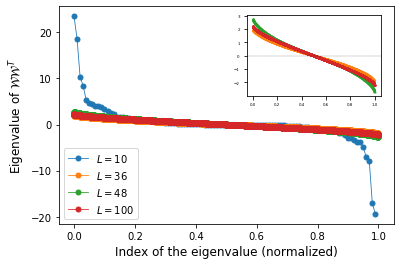

In [104]:
plot_eigen(x_L010, x_L036, x_L048, x_L100,
           y_L010, y_L036, y_L048, y_L100,
           L1, L2, L3, L4,
           xlabel= 'Index of the eigenvalue (normalized)',
           ylabel= 'Eigenvalue of ${\cal W}{\cal W}^{T}$',
           SVD= False,
           publication= False,
           eps= False,
           save= False)

# Comparing singular values of $ {\cal W}$

In [106]:
s_L010 = torch.load('weight_analysis/L010/L010_ALL_W_svd_singular_values.pt')
s_L036 = torch.load('weight_analysis/L036/L036_ALL_W_svd_singular_values.pt')
s_L048 = torch.load('weight_analysis/L048/L048_ALL_W_svd_singular_values.pt')
s_L100 = torch.load('weight_analysis/L100/L100_ALL_W_svd_singular_values.pt')

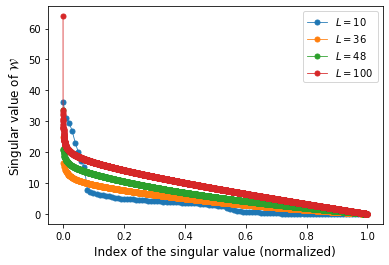

In [121]:
plot_eigen(x_L010, x_L036, x_L048, x_L100,
           np.sort(s_L010.numpy()), np.sort(s_L036.numpy()), 
           np.sort(s_L048.numpy()), np.sort(s_L100.numpy()),
           L1, L2, L3, L4,
           xlabel= 'Index of the singular value (normalized)',
           ylabel= 'Singular value of ${\cal W}$',
           loc_legend= 'upper right',
           SVD= True,
           inset= False,
           publication= False,
           eps= False,
           save= False)